### Àlex Corre Orri 1564967
### Júlia Pumares Benaiges 1566252

### Pràctica 2 Dataset IRIS

#### APARTAT B: dataset IRIS

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn import svm, datasets
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Perceptron
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import cross_val_score
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
import pandas as pd
from sklearn.metrics import confusion_matrix
import seaborn as sns
from sklearn.model_selection import cross_val_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn import metrics
from sklearn.ensemble import AdaBoostClassifier
import warnings
warnings.filterwarnings('ignore')

In [2]:
# import some data to play with
iris = datasets.load_iris()

# Take the first two features. We could avoid this by using a two-dim dataset
X = iris.data[:, :2]
y = iris.target

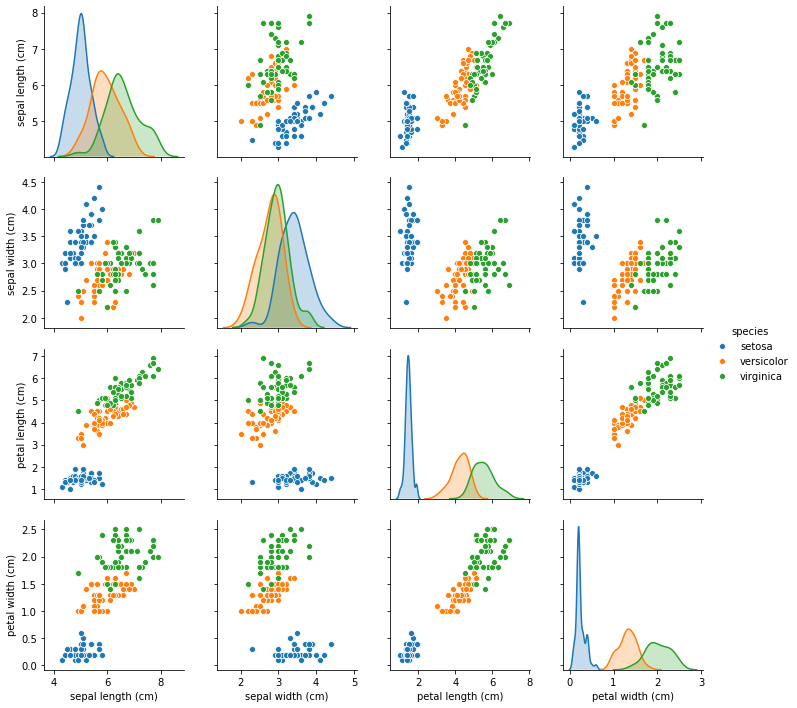

In [3]:
df = pd.DataFrame(iris.data, columns=iris.feature_names)
# sklearn provides the iris species as integer values since this is required for classification
# here we're just adding a column with the species names to the dataframe for visualisation
df['species'] = np.array([iris.target_names[i] for i in iris.target])
sns.pairplot(df, hue='species')

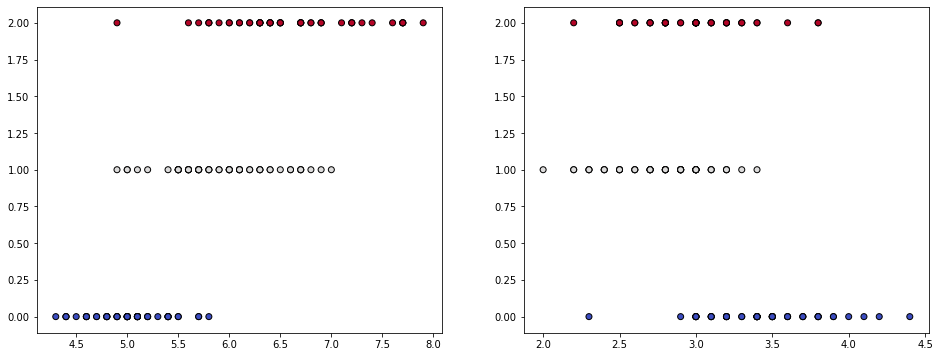

In [4]:
n_classes = 3
    
fig, sub = plt.subplots(1, 2, figsize=(16,6))
sub[0].scatter(X[:,0], y, c=y, cmap=plt.cm.coolwarm, edgecolors='k')
sub[1].scatter(X[:,1], y, c=y, cmap=plt.cm.coolwarm, edgecolors='k')

In [5]:
particions = [0.5, 0.7, 0.8]
scores = {}

for part in particions:
    print("PART: "+str(part)+" %")
    x_t, x_v, y_t, y_v = train_test_split(X, y, train_size=part)

    #DecisionTree
    clft = DecisionTreeClassifier(random_state=0, max_depth=2)
    clft.fit(x_t, y_t)
    #print ("Correct classification Decision Tree:      ", round(clft.score(x_v, y_v),2))
    scores["Decision Tree      "] = round(clft.score(x_v, y_v),2)
    
    #KNeighbors
    neigh = KNeighborsClassifier(n_neighbors=3)
    neigh.fit(x_t, y_t) 
    #print ("Correct classification KNeighbors:         ", round(neigh.score(x_v, y_v),2))
    scores["KNeighbors         "] = round(neigh.score(x_v, y_v),2)

    #bagging
    bagging = BaggingClassifier(KNeighborsClassifier(n_neighbors=3), max_samples=0.5, max_features=0.5)
    bagging.fit(x_t, y_t)
    #print ("Correct classification Bagging KNeighbors: ", round(bagging.score(x_v, y_v),2))
    scores["Bagging KNeighbors "] = round(bagging.score(x_v, y_v),2)
    
    #adaboost
    adaB = AdaBoostClassifier(n_estimators=100)
    adaB.fit(x_t, y_t)
    #print ("Correct classification AdaBoostClassifier: ", round(adaB.score(x_v, y_v),2))
    scores["AdaBoost           "] = round(adaB.score(x_v, y_v),2)
    
    #naive bayes
    clfb = GaussianNB()
    clfb.fit(x_t, y_t)
    #print ("Correct classification Bayes               ", round(clfb.score(x_v, y_v),2))
    scores["Naive Bayes        "] = round(clfb.score(x_v, y_v),2)
    
    #perceptron
    clf = Perceptron(tol=1e-3, random_state=0)
    clf.fit(x_t, y_t)
    #print ("Correct classification Perceptro           ", round(clf.score(x_v, y_v),2))
    scores["Perceptron         "] = round(clf.score(x_v, y_v),2)
    
    #regresor lineal
    linreg = LinearRegression().fit(x_t, y_t)
    #print ("Correct classification Lineal              ", round(linreg.score(x_v, y_v),2))
    scores["Lineal             "] = round(linreg.score(x_v, y_v),2)
    
    #regresor logístic
    logireg = LogisticRegression(C=2.0, fit_intercept=True, penalty='l2', tol=0.001)
    logireg.fit(x_t, y_t)
    #print ("Correct classification Logistic            ", round(logireg.score(x_v, y_v),2))
    scores["Logístic           "] = round(logireg.score(x_v, y_v),2)
    
    #SVC
    svc = svm.SVC(C=10.0, kernel='rbf', gamma=0.9, probability=True)
    svc.fit(x_t, y_t)
    probs = svc.predict_proba(x_v)
    #print ("Correct classification SVM                 ", round(svc.score(x_v, y_v),2))
    scores["SVM                "] = round(svc.score(x_v, y_v),2)
    
    sort_scores = sorted(scores.items(), key=lambda x: x[1], reverse=True)

    for i in sort_scores:
        print("Correct classification ", i[0], i[1])
    
    print("\n")

PART: 0.5 %
Correct classification  Naive Bayes         0.85
Correct classification  SVM                 0.85
Correct classification  AdaBoost            0.76
Correct classification  Lineal              0.73
Correct classification  Bagging KNeighbors  0.68
Correct classification  KNeighbors          0.67
Correct classification  Logístic            0.67
Correct classification  Decision Tree       0.63
Correct classification  Perceptron          0.37


PART: 0.7 %
Correct classification  Decision Tree       0.8
Correct classification  Naive Bayes         0.78
Correct classification  Logístic            0.78
Correct classification  SVM                 0.76
Correct classification  KNeighbors          0.73
Correct classification  Bagging KNeighbors  0.67
Correct classification  Lineal              0.64
Correct classification  Perceptron          0.51
Correct classification  AdaBoost            0.38


PART: 0.8 %
Correct classification  SVM                 0.77
Correct classification  Naive 

In [6]:
def cross_validation(regression, n_folds):
    scores = cross_val_score(regression, X, y, cv=n_folds)
    print ("Scores      :  ", scores)
    print ("Scores Mean :  ", scores.mean())
    print ("Scores std  :  ", scores.std())

In [7]:
folds = 5

print("LogisticRegression:")
logireg = LogisticRegression(C=2.0, fit_intercept=True, penalty='l2', tol=0.001)
cross_validation(logireg, folds)

print("\nKNeighborsClassifier:")
neigh = KNeighborsClassifier(n_neighbors=3)
cross_validation(neigh, folds)

print("\nBaggingClassifier:")
bagging = BaggingClassifier(KNeighborsClassifier(n_neighbors=3), max_samples=0.5, max_features=0.5)
cross_validation(bagging, folds)

LogisticRegression:
Scores      :   [0.73333333 0.8        0.66666667 0.83333333 0.8       ]
Scores Mean :   0.7666666666666666
Scores std  :   0.05962847939999443

KNeighborsClassifier:
Scores      :   [0.66666667 0.8        0.63333333 0.86666667 0.66666667]
Scores Mean :   0.7266666666666667
Scores std  :   0.09043106644167027

BaggingClassifier:
Scores      :   [0.56666667 0.73333333 0.7        0.66666667 0.7       ]
Scores Mean :   0.6733333333333332
Scores std  :   0.0573488351136175


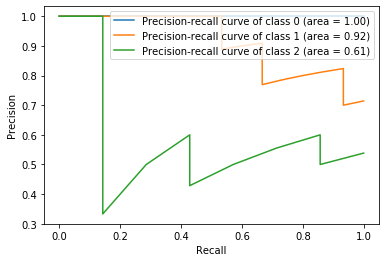

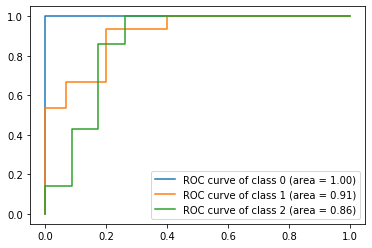

In [8]:
from sklearn.metrics import f1_score, precision_recall_curve, average_precision_score, roc_curve, auc

# Compute Precision-Recall and plot curve
precision = {}
recall = {}
average_precision = {}
plt.figure()
for i in range(n_classes):
    precision[i], recall[i], _ = precision_recall_curve(y_v == i, probs[:, i])
    average_precision[i] = average_precision_score(y_v == i, probs[:, i])

    plt.plot(recall[i], precision[i],
    label='Precision-recall curve of class {0} (area = {1:0.2f})'
                           ''.format(i, average_precision[i]))
    plt.xlabel('Recall')
    plt.ylabel('Precision')
    plt.legend(loc="upper right")

    
# Compute ROC curve and ROC area for each class
fpr = {}
tpr = {}
roc_auc = {}
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_v == i, probs[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Compute micro-average ROC curve and ROC area
# Plot ROC curve
plt.figure()
for i in range(n_classes):
    plt.plot(fpr[i], tpr[i], label='ROC curve of class {0} (area = {1:0.2f})' ''.format(i, roc_auc[i]))
plt.legend()

In [9]:
import numpy as np
import matplotlib.pyplot as plt


def make_meshgrid(x, y, h=.02):
    """Create a mesh of points to plot in

    Parameters
    ----------
    x: data to base x-axis meshgrid on
    y: data to base y-axis meshgrid on
    h: stepsize for meshgrid, optional

    Returns
    -------
    xx, yy : ndarray
    """
    x_min, x_max = x.min() - 1, x.max() + 1
    y_min, y_max = y.min() - 1, y.max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))
    return xx, yy


def plot_contours(ax, clf, xx, yy, **params):
    """Plot the decision boundaries for a classifier.

    Parameters
    ----------
    ax: matplotlib axes object
    clf: a classifier
    xx: meshgrid ndarray
    yy: meshgrid ndarray
    params: dictionary of params to pass to contourf, optional
    """
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    out = ax.contourf(xx, yy, Z, **params)
    return out

def show_C_effect(C=1.0, gamma=0.7, degree=3):

    # import some data to play with
    iris = datasets.load_iris()
    # Take the first two features. We could avoid this by using a two-dim dataset
    X = iris.data[:, :2]
    y = iris.target

    # we create an instance of SVM and fit out data. We do not scale our
    # data since we want to plot the support vectors
    # title for the plots
    titles = ('SVC with linear kernel',
              'LinearSVC (linear kernel)',
              'SVC with RBF kernel',
              'SVC with polynomial (degree 3) kernel')

    #C = 1.0  # SVM regularization parameter
    models = (svm.SVC(kernel='linear', C=C),
              svm.LinearSVC(C=C, max_iter=1000000),
              svm.SVC(kernel='rbf', gamma=gamma, C=C),
              svm.SVC(kernel='poly', degree=degree, gamma='auto', C=C))
    models = (clf.fit(X, y) for clf in models)

    plt.close('all')
    fig, sub = plt.subplots(2, 2, figsize=(14,9))
    plt.subplots_adjust(wspace=0.4, hspace=0.4)

    X0, X1 = X[:, 0], X[:, 1]
    xx, yy = make_meshgrid(X0, X1)

    for clf, title, ax in zip(models, titles, sub.flatten()):
        plot_contours(ax, clf, xx, yy,
                      cmap=plt.cm.coolwarm, alpha=0.8)
        ax.scatter(X0, X1, c=y, cmap=plt.cm.coolwarm, s=20, edgecolors='k')
        ax.set_xlim(xx.min(), xx.max())
        ax.set_ylim(yy.min(), yy.max())
        ax.set_xlabel('Sepal length')
        ax.set_ylabel('Sepal width')
        ax.set_xticks(())
        ax.set_yticks(())
        ax.set_title(title)

    plt.show()


In [ ]:
#### A continuació podem veure com 

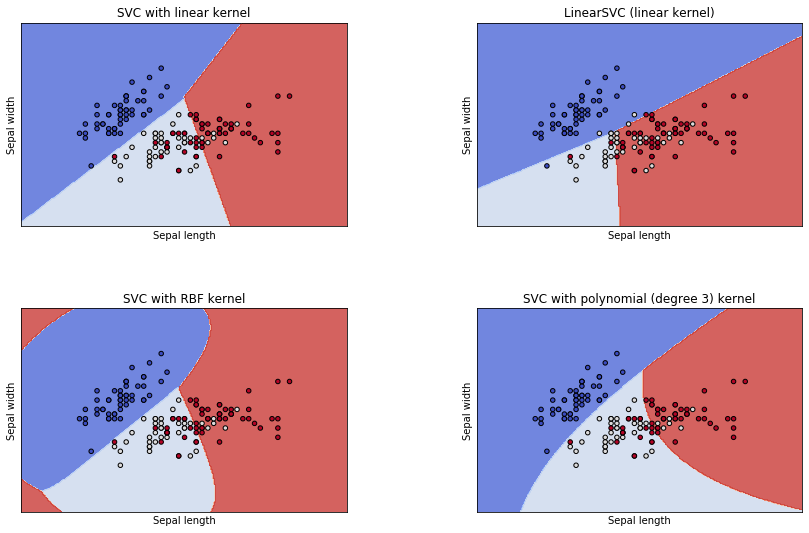

In [14]:
show_C_effect(C=0.1)

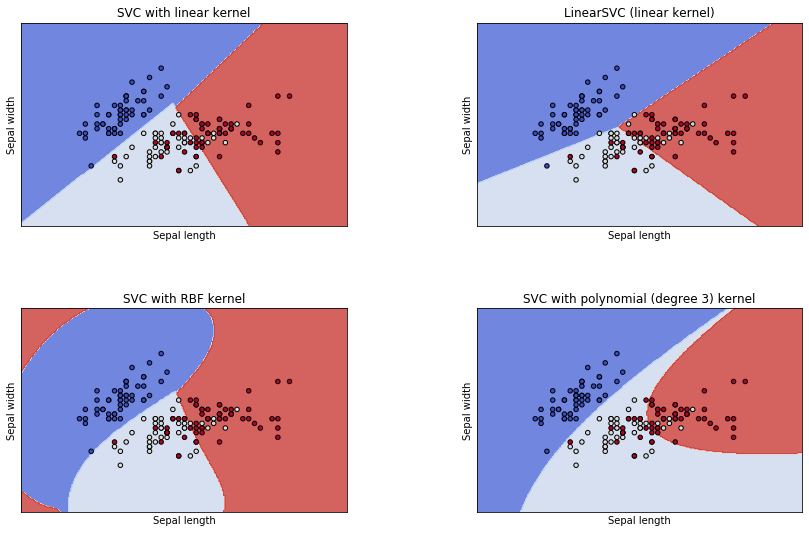

In [15]:
show_C_effect(C=1.0)

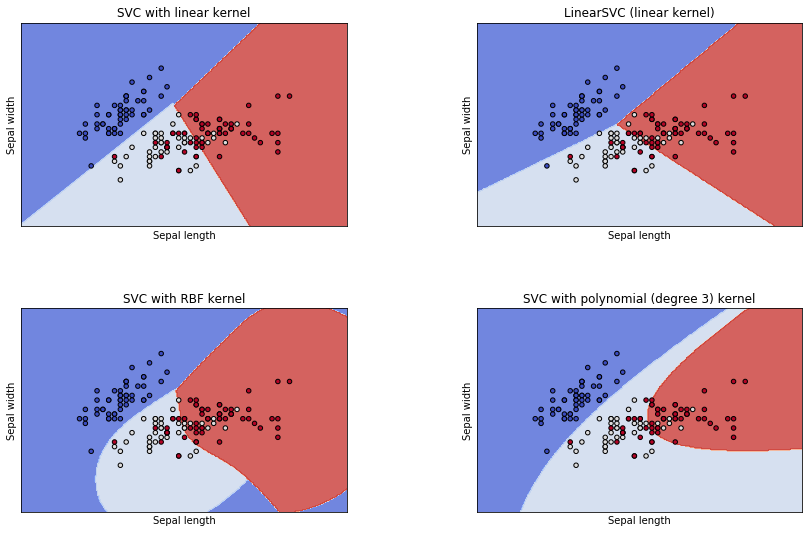

In [16]:
show_C_effect(C=10.0)

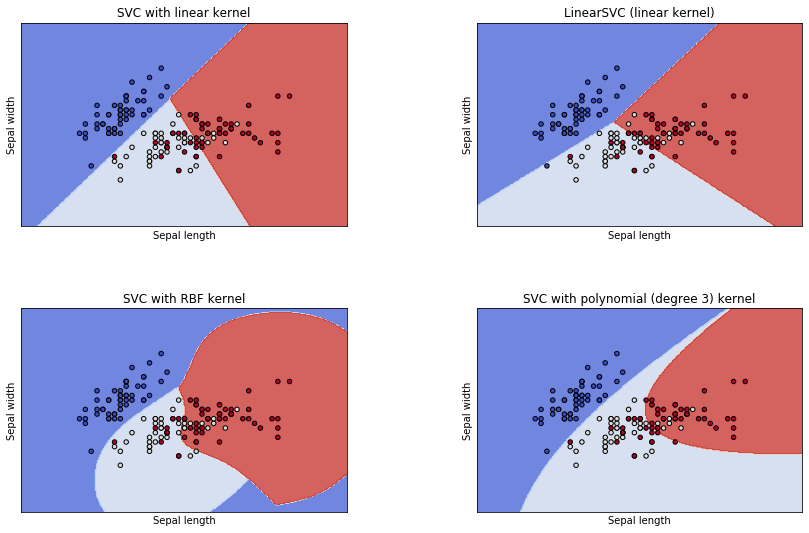

In [17]:
show_C_effect(C=50.0)

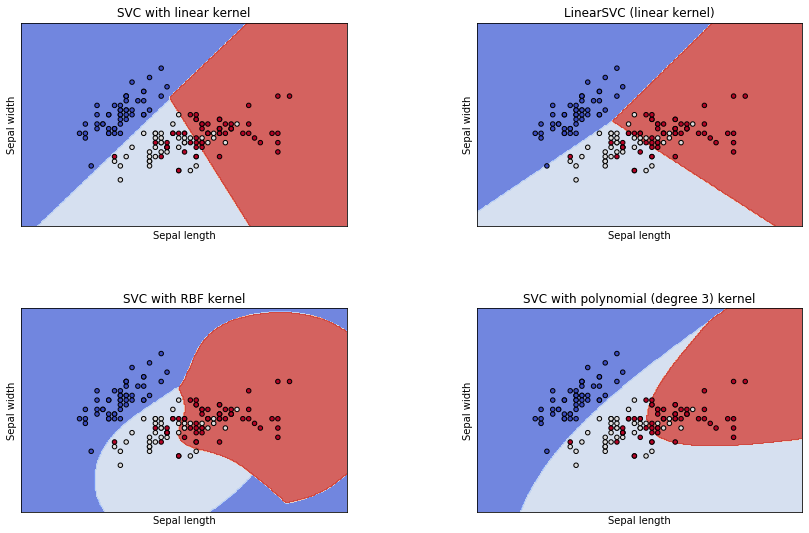

In [18]:
show_C_effect(C=100.0)